## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mouse_study.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_cleaned = mouse_study.drop_duplicates(['Mouse ID', 'Timepoint'], keep="last")


In [61]:
# Checking the number of mice in the clean DataFrame.
mouse_cleaned.value_counts('Mouse ID')

Mouse ID
z969    10
i177    10
l509    10
l471    10
k894    10
        ..
o848     1
n482     1
d133     1
u153     1
t573     1
Length: 249, dtype: int64

In [62]:
mouse_cleaned.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [42]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_avg = mouse_cleaned.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']

drug_avg


Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.736964
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor Volume (mm3), dtype: float64

In [43]:
regimen_groups = mouse_cleaned.groupby('Drug Regimen')

In [44]:
regimen_median = regimen_groups['Tumor Volume (mm3)'].median()
regimen_median

Drug Regimen
Capomulin    38.125164
Ceftamin     59.851956
Infubinol    60.165180
Ketapril     64.487812
Naftisol     63.283288
Placebo      62.030594
Propriva     55.841410
Ramicane     36.561652
Stelasyn     62.192350
Zoniferol    61.840058
Name: Tumor Volume (mm3), dtype: float64

In [45]:

regimen_var = regimen_groups['Tumor Volume (mm3)'].var()
regimen_var


Drug Regimen
Capomulin     32.663378
Ceftamin      69.982735
Infubinol     74.010875
Ketapril      98.921330
Naftisol     106.029927
Placebo       78.759797
Propriva      69.349002
Ramicane      32.166354
Stelasyn      90.331586
Zoniferol     76.862027
Name: Tumor Volume (mm3), dtype: float64

In [46]:
regimen_std = regimen_groups['Tumor Volume (mm3)'].std()
regimen_std

Drug Regimen
Capomulin     5.715188
Ceftamin      8.365568
Infubinol     8.602957
Ketapril      9.945920
Naftisol     10.297083
Placebo       8.874672
Propriva      8.327605
Ramicane      5.671539
Stelasyn      9.504293
Zoniferol     8.767099
Name: Tumor Volume (mm3), dtype: float64

In [47]:
regimen_sem = regimen_groups['Tumor Volume (mm3)'].sem()
regimen_sem

Drug Regimen
Capomulin    1.143038
Ceftamin     1.673114
Infubinol    1.720591
Ketapril     1.989184
Naftisol     2.059417
Placebo      1.774934
Propriva     1.665521
Ramicane     1.134308
Stelasyn     1.940056
Zoniferol    1.753420
Name: Tumor Volume (mm3), dtype: float64

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_stats_df = pd.DataFrame ({
    "Mean": drug_avg,
    "Median": regimen_median,
    "Variance": regimen_var,
    "Standard Deviations": regimen_std,
    "SEM": regimen_sem
    
    
})
regimen_stats_df

,Mean,Median,Variance,Standard Deviations,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [49]:
# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

In [50]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

count_regimen =mouse_cleaned.groupby(['Drug Regimen']).count()["Mouse ID"]
count_regimen

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

<AxesSubplot:title={'center':'Measurements for each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Measurements'>

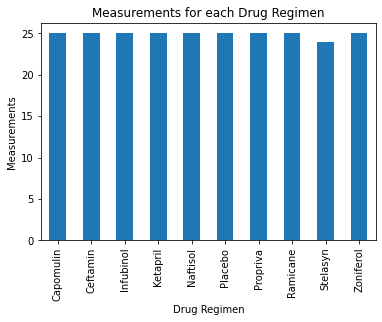

In [51]:
mouse_cleaned.groupby('Drug Regimen').count()["Mouse ID"].plot(kind='bar', legend =False, title="Measurements for each Drug Regimen", ylabel = "Measurements")


In [36]:
#drug_cleaned = mouse_study.drop_duplicates('Drug Regimen', keep="last")
#drug_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
453,y449,Ramicane,Male,19,24,15,44.183451,0
1455,r157,Capomulin,Male,22,25,15,46.539206,0
1777,x613,Zoniferol,Female,2,29,15,48.077646,0
1823,y260,Ketapril,Female,7,25,45,62.909441,4
1833,y478,Placebo,Female,3,25,45,66.842635,1
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1892,z969,Naftisol,Male,9,30,45,73.867845,4


<BarContainer object of 10 artists>

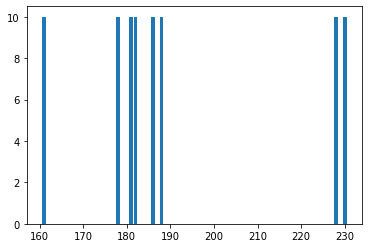

In [37]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



<AxesSubplot:title={'center':'Gender Breakdown of Mice'}, ylabel='Mouse ID'>

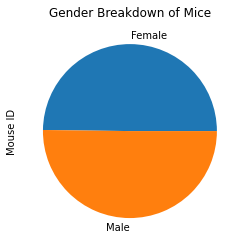

In [52]:
mouse_cleaned.groupby('Sex').count()["Mouse ID"].plot(kind='pie', title="Gender Breakdown of Mice")



In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = mouse_cleaned.groupby(['Sex']).count()['Mouse ID']
gender

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Gender Breakdown of Mice')

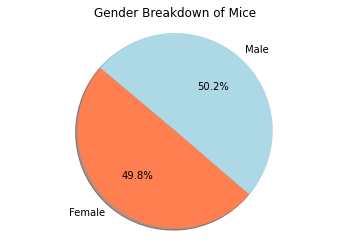

In [54]:
colors = ["coral","lightblue"]
labels = ["Female", "Male"]

plt.pie(gender, labels = labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Gender Breakdown of Mice")

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_cleaned.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

In [40]:
# Start by getting the last (greatest) timepoint for each mouse
timepoint = mouse_study.groupby(['Mouse ID']).max('Drug Regimen')

timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a203,20,23,45,67.973419,2
a251,21,25,45,65.525743,1
a262,17,29,45,70.717621,4
a275,20,28,45,62.999356,3
a366,16,29,30,63.440686,1
...,...,...,...,...,...
z435,12,26,10,48.710661,0
z578,11,16,45,45.000000,0
z581,24,25,45,62.754451,3


In [24]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
